# Boosting Algorithm

## 1. About Boosting Algorithm

부스팅 알고리즘은 여러 개의 weak learners를 하나의 strong learner로 결합하여 예측 혹은 분류를 수행하는 앙상블 기법이다.
- 앙상블 기법은 overfitting을 방지하기 위한 기법이다. weak 모델 여러개를 결합시켜 하나의 결과를 출력하는 것이 앙상블 기법의 기본적인 아이디어다.

부스팅 알고리즘은 이러한 앙상블 기법에 sequential이 추가된다. 이전 단계의 weak learner의 에러를 통해 현 단계의 weak learner를 개선하는 것이다.

대표적인 부스팅 알고리즘은 다음과 같다.
- AdaBoost
- GBM(Gradient Boosting Machine)
- XGBoost
- LightGBM
- CatBoost

### 1) AdaBoost

**AdaBoost**는 오류데이터에 가중치를 부여(weights get boosted)하면서 부스팅을 수행하는 대표적인 알고리즘이다. 잘못 분류된 데이터에 가중치를 부여하고 이때 Decision Tree를 weak learner로 사용하게 된다.

AdaBoost의 학습 과정은 다음과 같다.



1. 초기 가중치인 ${w}^{(i)}$는 $\frac{1}{m}$로 설정한다.

2. 훈련 데이터에 대해서 첫번째 predictor가 학습하고 weighted error rate인 ${r}_{1}$가 Equation 7-1에 따라 계산된다.
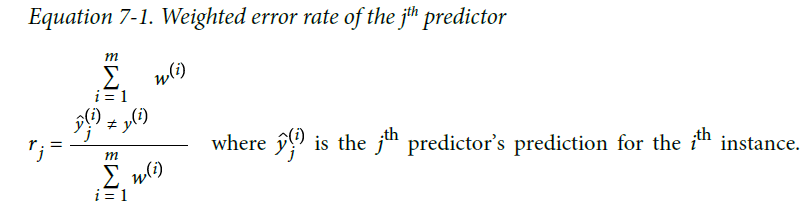

3. 예측 가중치인 ${α}_{j}$는 Equation 7-2에 따라서 계산된다.

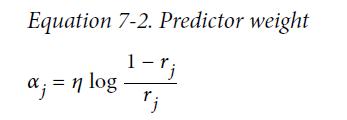

4. 잘못 분류된 경우는 boosting 되어 가중치가 Equation 7-3에 따라 업데이트 된다.

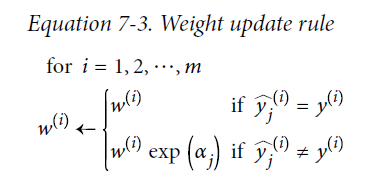


5. 업데이트된 모든 가중치를  ${w}^{(i)}$들의 합으로 나눠서 정규화한다.

6. 이렇게 업데이트된 가중치를 가지고 new predictor가 학습을 수행한다. 그리고 위의 1~5 과정을 반복한다.

7. predictor 개수가 마지막에 도달하거나 정확한 predictor를 찾게 되면 학습을 종료한다.

아래 코드를 통해 AdaBoost를 확인한다.

In [ ]:
# 라이브러리
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# 데이터 불러오기
iris = datasets.load_iris()

In [ ]:
# X, Y 데이터 생성
X = iris.data
Y = iris.target

In [ ]:
# Train 데이터와 Test 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
# AdaBoost Classifier
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1)

In [ ]:
# 모델 적합
model = abc.fit(X_train, Y_train)

In [ ]:
# 예측값 계산
Y_pred = model.predict(X_test)

In [ ]:
# 모델의 정확도 계산
acc = metrics.accuracy_score(Y_test, Y_pred)
print('모델의 정확도 :', acc)

모델의 정확도 : 0.9777777777777777


- AdaBoost는 weak learner로 Decision Tree를 사용하기 때문에 이를 확인해본다.

In [ ]:
# 라이브러리
from sklearn.tree import DecisionTreeClassifier

# base learner와 AdaBoost
base = DecisionTreeClassifier(max_depth = 5)
adc2 = AdaBoostClassifier(estimator = base,
                          n_estimators = 50,
                          learning_rate = 1)

In [ ]:
model2 = adc2.fit(X_train, Y_train)

In [ ]:
Y_pred2 = model2.predict(X_test)

In [ ]:
acc2 = metrics.accuracy_score(Y_test, Y_pred2)
print('모델의 정확도 :', acc2)

모델의 정확도 : 0.9777777777777777


- 동일한 결과가 나옴을 알 수 있다.

AdaBoost를 통해 간단한 분류를 구현한 코드는 위와 같다. 여기서 사용되는 ```max_depth```, ```n_estimators```, ```learning_rate```는 모두 **하이퍼파라미터**에 해당되며 최적의 하이퍼파라미터는 grid search를 통해 확인할 수 있다.

### 2) GBM(Gradient Boosting Machine)

**Gradient Boosting**은 앙상블에 predecessor(이전 predictors)를 수정해가면서, predictors를 순차적으로 더하며 작동한다. 그러나 AdaBoost와는 다르게 이전 predict에서 만들어진 **residual error**에 기반하여 모델이 작동한다.

Regression task를 수행하는 **Gradient Boosted Regression Trees(GBRT)**의 예시를 살펴본다.

1. 가장 먼저 훈련데이터를 ```DecisionTreeRegressor```에 적합시킨다.
```
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)
```

2. 두번째 ```DecisionTreeRegressor```에 **residual error**를 적합한다.
```
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)
```

3. 세번째 Regressor에 두번째 모델로부터 나온 residual error를 적합한다.
```
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)
```

4. Tree들을 포함하는 앙상블을 만들었다. 모든 Tree를 더함으로써 prediction이 가능하다.
```
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
```

5. 이렇게 각각의 Tree를 하나로 합쳐 만든 GBRT 앙상블 모델은 ```GradientBoostingRegressor```를 통해서 구현이 가능하다.
- ```RandomForestRegressor```와 동일하게 Decision Tree의 크기를 조절하는 하이퍼파라미터가 있다(```max_depth```, ```min_samples_leaf``` 등등)
- Tree의 수를 조절하는 하이퍼파라미터가 있다(```n_estimators```)

위 과정을 하나의 코드로 요약하면 다음과 같다.
```
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)
```
- Tree의 개수가 3개 였으므로 ```n_estimator```는 3으로, ```max_depth```는 Decision Tree의 크기와 동일하게 2로 설정해준다.
- ```learning_rate```는 각 Tree의 기여도를 설정하는 하이퍼파라미터이다. 작게 설정할수록 앙상블 안에 학습에 필요한 Tree가 더 많이 필요하게 되며 prediction이 일반화될 가능성이 높다. 그러나 그만큼 overfitting의 위험성도 있다. (아래 그림 참고)

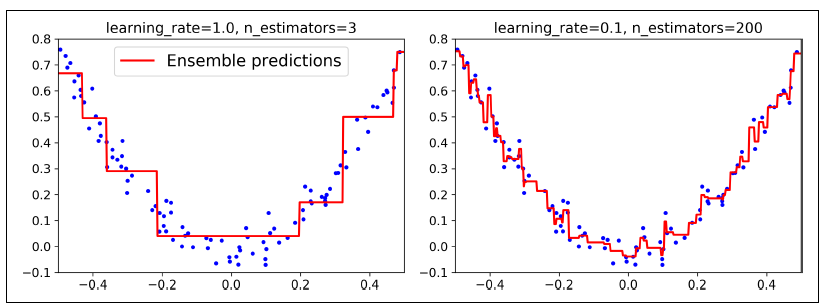

- 최적의 Tree 개수를 찾기 위해서 early stopping을 사용할 수 있다.
- ```staged_predict()```를 사용해서 이를 구현하 수 있다.
- 반복적으로 학습하면서 Tree 개수를 늘려가면서 앙상블을 통한 prediction을 리턴해준다.
- 아래 코드를 통해 예시를 확인할 수 있다.

```
# 라이브러리
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
```

```
# 훈련 데이터 셋과 검증 데이터 셋으로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y)
```

```
# Gradient Based 모델 생성 후 적합
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120) # 트리 개수는 120개
gbrt.fit(X_train, y_train)
```

```
# 반복하여 early stopping마다 MSE를 계산
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
```

```
# error가 가장 작은 원소의 값을 argmin을 통해 반환
bst_n_estimators = np.argmin(errors)
```

```
# 위에서 구한 bst_n_estimators를 활용하여 다시 Gradient Based 모델 생성 후 적합
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)
```

- 위의 코드는 120개를 전부 다 학습 후 early stopping을 진행했지만 처음부터 early stopping을 시작하도록 코드를 작성할 수 있다. 전부 다 학습 후 최적의 기준에서 stopping을 적용하는 것을 **사후 가지치기**, iteration마다 residual 값을 살피며 early stopping을 진행하는 것을 **사전 가지치기**라고 한다.
- 사전 가지치기는 ```warm_start=True```를 설정하여 구현할 수 있다.
- 쉽게 생각해서 **incremental training**을 진행하는 것이다.
- 아래 코드는 연속으로 5번 동안 validation error가 개선되지 않으면 훈련이 종료된다.

```
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping
```

- GBM 하이퍼 파라미터 및 튜닝은 다음 블로그를 참고(https://nicola-ml.tistory.com/98)

### 3) XGBoost(Extreme Gradient Boosting)

**XGBoost(XGB)**는 GBM에서 파생된 부스팅 알고리즘이다. 따라서 GBM과 유사하게 weak learner로 Decision Tree를 사용하고 잔차를 이용하여 모델을 강화해 나간다. XGB는 GBM의 병렬 학습을 가능하도록 한다. 병렬 학습이 가능하기 때문에 학습 시간이 굉장히 빠르다.

XGB는 GBM에서 과적합 방지를 위한 두개의 파라미터가 추가되었다고 생각하면 된다.
- 구체적인 알고리즘 작동 방식은 https://zephyrus1111.tistory.com/232 참고

XGB는 성능을 위해 하이퍼파라미터를 튜닝해주는 것이 중요하다. XGB의 하이퍼파라미터는 3가지 범주로 나눌 수 있다. **일반 파라미터**, **부스터 파라미터**, **학습 과정 파라미터**
- 파라미터에 대한 자세한 설명은 https://wooono.tistory.com/97 참고

**부스터 파라미터**

> - learning_rate : 학습률을 조정하는 파라미터로 0과 1 사이의 값으로 지정한다.
- n_estimators : 앙상블할 '약한 학습기(weak learner)'의 개수를 지정한다. 개수가 많을수록 성능이 일정수준까지 좋아지지만 수행시간 늘어난다,
- max_depth : 트리를 성장시킬 최대 깊이를 지정함. 보통 3에서 10 사이의 값을 적용한다.
- min_child_weight : 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합을 설정한다. 과적합을 조절하기 위한 것이며, 값이 클수록 분할을 자제한다.
- gamma : 트리의 리프노드를 추가적으로 나눌지 결정할 최소 손실 감소값을 설정한다. 이 값보다 손실이 크게 감소되어야 리프노드를 분할하는 것이다. 값이 클수록 과적합이 감소하는 효과가 있다.
- early_stopping_rounds : 조기종료를 위한 반복횟수를 설정한다. 여기서 설정한 N번 반복하는 동안 성능평가지표가 향상되지 않으면 반복을 멈춘다.
- subsample : 트리가 커져서 과적합되는 것을 제어하기 위한 데이터 샘플링 비율을 지정한다. 0과 1 사이의 값으로 설정할 수 있는데, 예를 들어 0.5로 지정하면 전체 데이터 절반을 트리 생성에 사용함.
- colsample_bytree : GBM의 max_features와 유사한 것으로, 트리 생성에 필요한 feature를 임의로 샘플링하는 데 사용한다. feature가 많은 경우 이 설정을 하면 과적합을 조정할 수 있다.


**학습 과정 파라미터**

> - objective : 최솟값을 가져야 할 손실함수를 설정한다. 이진분류, 다중분류 등에 따라 다양한 손실함수를 사용할 수 있다.
- eval_metric : 검증에 사용하는 함수를 설정한다. 회귀는 rmse가 기본이고, 분류는 error가 기본이다.

In [ ]:
# 라이브러리
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 데이터
data = load_breast_cancer()

In [ ]:
# 데이터셋의 특성 데이터
X = data.data

# 데이터셋의 타겟 데이터
y = data.target

데이터셋 크기: (569, 30)
특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
타겟 이름: ['malignant' 'benign']


In [ ]:
# Train, Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# XGB 분류기 생성
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# 예측값 확인
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# 정확도 측정
accuracy_score(y_pred, y_test)

0.9649122807017544

- 정확도는 약 96%로 나오고 있다.

In [ ]:
# 혼동 행렬 확인
confusion_matrix(y_pred, y_test)

array([[ 60,   3],
       [  3, 105]])

### 4) LGBM(Light Gradient Boosting Machine)

LGBM 또한 트리 기반 GBM 기법 중 하나이다. 다른 부스팅 기법과 차이가 나는 점은 트리를 수직으로 확장한다는 점이다. leaf-wise tree grwoth라는 점이 특이하다.

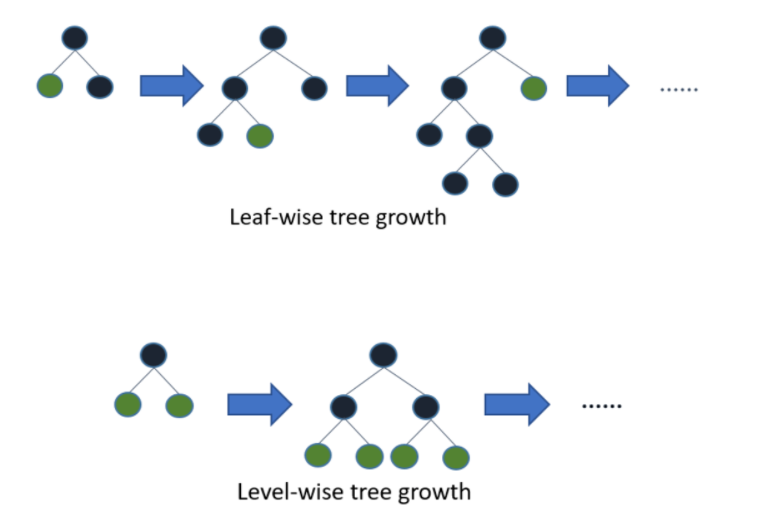

- LGBM은 굉장히 빠른 속도를 보여주지만 과적합에 취약하다는 단점이 있다.



LGBM의 주요 파라미터 구분은 XGB와 같고 구분은 아래와 같다.
- 하이퍼파라미터에 대한 자세한 설명은 https://herjh0405.tistory.com/40 참고

**부스터 파라미터**

>- learning_rate : 학습률을 조정하는 파라미터로 0과 1 사이의 값을 지정한다.
- n_estimators : 앙상블할 '약한 학습기(weak learner)'의 개수를 지정한다.
- max_depth : 트리를 성장시킬 최대 깊이를 지정한다. 이때 LGBM은 leaf wise 기반 모델이므로 깊이가 상대적으로 더 깊다.
- min_child_samples : 리프노드(최종 결정 클래스)가 되기 위해서 최소한으로 필요한 레코드 수를 설정한다.
- num_leaves : 하나의 트리가 가질 수있는 최대 리프 개수를 설정하고 기본값은 31이다.
- subsample : 트리가 커져서 과적합되는 것을 제어하기 위한 데이터 샘플링 비율을 지정하고 0과 1 사이의 값으로 설정할 수 있다.
- colsample_bytree : 트리 생성에 필요한 feature를 임의로 샘플링하는 데 사용한다.

**학습 파라미터**

>- objective : 손실함수를 설정한다. 이진분류, 다중분류 등에 따라 다양한 손실함수를 사용할 수 있고, 기본값은 'reg:linear'이다.
- eval_metric : 검증에 사용하는 함수를 설정함. 회귀는 rmse가 기본이고, 분류는 error가 기본이다.

XGB와 같은 데이터셋을 사용해서 간단한 LGBM을 구현한다.

In [ ]:
# 시드 고정
import numpy as np

np.random.seed(111)

In [ ]:
# 라이브러리
from lightgbm import LGBMClassifier

In [ ]:
# 분류기 생성
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# 예측값 확인
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy_score(y_pred, y_test)

0.9824561403508771

- XGB보다 더욱 개선된 결과를 보인다.

### 5) CatBoost

**CatBoost**는 XGBoost와 마찬가지로 level-wise로 트리를 분기한다는 점이다.
- level-wise와 leaf-wise 두 방법 모두 트리를 full-depth로 기르고 나면 동일한 트리가 탄생한다. 하지만 우리가 full tree를 사용하지 않고 cut-off를 하기 때문에 두 방법은 유의한 차이가 있는 결과를 내는 것이다.
- leaf-wise는 분기가 발생할때 특정 branch(줄기)를 따르는 것이 아니라 'global loss'를 더 줄일 수 있는 방향으로 확장하는 것을 택한다. 따라서 level-wise보다는 대개의 경우 더 정확도가 높은 트리를 빨리 발견할 수 있다.
- 즉 트리 노드가 많지 않을 경우 통상 level-wise보다 leaf-wise 트리가 더 높은 정확도를 보일 것이다.
- 참고 : https://julie-tech.tistory.com/119



CatBoost가 다른 Gradient based 부스팅 방법과 다른 점은 전체 데이터로 잔차를 계산하는 것이 아니라 학습데이터의 일부만으로 잔차계산을 한 뒤, 이 결과로 모델을 다시 만들게 된다.
- 쉽게 생각해보면 10개의 데이터가 있다면, 이 중에서 2개를 학습하고 4개를 학습하는 등 데이터를 선택하여 학습하게 된다.
- 이를 **Ordered Boosting**이라고 한다.
- CatBoost는 이런 순서를 random하게 뽑는다.

CatBoost의 가장 큰 장점은 이름에서도 알 수 있듯이 '범주형 변수'가 많은 데이터를 학습할 때 가장 좋은 성능을 보인다.
- **Response encoding**과 **Categorical Feature Combination** 방법을 사용하여 범주형 변수를 처리한다.
- Ordered Boosting의 개념을 섞어 학습 데이터를 random하게 선택하여 학습하는데 이때 order는 시간 순서를 따른다. 시간 순서로 나열 후에는 과거 데이터를 바탕으로 Response encoding을 진행한다.
- Response encoding은 각 범주의 target 값으로 label을 만들어 주는 것이다.

Catboost는 범주형 저료를 처리하는 데에 효율적일 뿐만 아니라 Response encoding과 Categorical Feature Combination을 사용하기 때문에 시계열 데이터를 처리하는데도 효율적이다. 그리고 imbalanced 데이터도 weight를 조절하며 예측력을 높일 수 있다. LGBM과 XGB와 마찬가지로 과접합을 피하는 방법 또한 내부적으로 존재한다.

In [ ]:
# 라이브러리
import numpy as np
import pandas as pd

In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/train (1).csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/test (1).csv')

In [ ]:
# 데이터 확인
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


- Train과 Test 모두 결측치는 없다.

In [ ]:
train_df.nunique()

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [ ]:
test_df.nunique()

id                  58921
RESOURCE             4971
MGR_ID               4689
ROLE_ROLLUP_1         126
ROLE_ROLLUP_2         177
ROLE_DEPTNAME         466
ROLE_TITLE            351
ROLE_FAMILY_DESC     2749
ROLE_FAMILY            68
ROLE_CODE             351
dtype: int64

In [ ]:
train_df.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


- 모든 feature가 범주형 변수임을 알 수 있다.
- unique한 값이 많기 때문에 one-hot encoding은 진행하지 않는다.

In [ ]:
# Feature와 타겟 설정
X = train_df.drop('ACTION', axis = 1)
y = train_df['ACTION']

In [ ]:
# feature 크기 확인
X.shape # (32769, 9)
cat_feature = list(range(0, X.shape[1]))

In [ ]:
cat_feature

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
# Train과 validation set으로 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.4 MB/s eta 0:00:00


In [ ]:
# CatBoost 모델 생성
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=5, learning_rate=0.1)

In [ ]:
# 모델 훈련
model.fit(X_train, y_train,
          cat_features=cat_feature,
          eval_set=(X_val, y_val),
          verbose = False)

In [ ]:
# 모델 훈련 시 하이퍼파라미터 확인
model.get_params()

{'iterations': 5, 'learning_rate': 0.1}

In [ ]:
# 모델 훈련 과정 확인
model.fit(X_train, y_train,
          cat_features=cat_feature,
          eval_set=(X_val, y_val))

0:	learn: 0.6189489	test: 0.6187790	best: 0.6187790 (0)	total: 45.8ms	remaining: 183ms
1:	learn: 0.5585414	test: 0.5579742	best: 0.5579742 (1)	total: 93.8ms	remaining: 141ms
2:	learn: 0.5083288	test: 0.5075307	best: 0.5075307 (2)	total: 105ms	remaining: 70.1ms
3:	learn: 0.4661280	test: 0.4649882	best: 0.4649882 (3)	total: 130ms	remaining: 32.5ms
4:	learn: 0.4305277	test: 0.4291119	best: 0.4291119 (4)	total: 147ms	remaining: 0us

bestTest = 0.4291119343
bestIteration = 4



- 설정해둔 5번의 iteration 중에서 가장 좋은 iteration은 4임을 확인할 수 있다.

In [ ]:
model = CatBoostClassifier(
    iterations=10
)

model.fit(
    X_train, y_train,
    cat_features=cat_feature,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.5
0:	learn: 0.3971379	test: 0.3960691	best: 0.3960691 (0)	total: 68.9ms	remaining: 620ms
1:	learn: 0.2948071	test: 0.2924021	best: 0.2924021 (1)	total: 128ms	remaining: 512ms
2:	learn: 0.2485317	test: 0.2454599	best: 0.2454599 (2)	total: 171ms	remaining: 400ms
3:	learn: 0.2234301	test: 0.2191836	best: 0.2191836 (3)	total: 219ms	remaining: 329ms
4:	learn: 0.1999100	test: 0.1935203	best: 0.1935203 (4)	total: 273ms	remaining: 273ms
5:	learn: 0.1911956	test: 0.1831193	best: 0.1831193 (5)	total: 326ms	remaining: 218ms
6:	learn: 0.1854231	test: 0.1763719	best: 0.1763719 (6)	total: 388ms	remaining: 166ms
7:	learn: 0.1818392	test: 0.1732419	best: 0.1732419 (7)	total: 441ms	remaining: 110ms
8:	learn: 0.1789139	test: 0.1679366	best: 0.1679366 (8)	total: 489ms	remaining: 54.3ms
9:	learn: 0.1777264	test: 0.1656210	best: 0.1656210 (9)	total: 542ms	remaining: 0us

bestTest = 0.1656210392
bestIteration = 9



- 여기서는 iteration 9일 때 가장 성능이 좋다.

In [ ]:
# Model prediction
model.predict_proba(X_val)

array([[0.02985352, 0.97014648],
       [0.01955598, 0.98044402],
       [0.01780024, 0.98219976],
       ...,
       [0.04551625, 0.95448375],
       [0.11208538, 0.88791462],
       [0.02216136, 0.97783864]])

In [ ]:
y_pred = model.predict(X_val)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
# 정확도 확인
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_val)

0.9453768690875801

## Boosting Algorithm Example

### 1) 데이터

In [ ]:
# 라이브러리
import pandas as pd

In [ ]:
# 데이터 읽어오기
train = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/test.csv')

In [ ]:
# 데이터 구조 확인
train.head()

,ID_code,price,carat,cut,color,clarity,depth,table,x,y,z
0,train_1,878,0.30,Premium,G,VVS2,62.9,55.0,4.28,4.24,2.68
1,train_2,3183,0.70,Premium,D,VS1,60.9,60.0,5.75,5.71,3.49
2,train_3,624,0.30,Ideal,G,VS1,62.0,56.0,4.29,4.32,2.67
3,train_4,743,0.33,Premium,H,VS1,61.9,58.0,4.45,4.43,2.75
4,train_5,526,0.25,Very Good,F,IF,63.3,59.0,3.99,4.04,2.54


In [ ]:
test.head()

,ID_code,carat,cut,color,clarity,depth,table,x,y,z
0,test_1,1.10,Very Good,F,SI1,60.5,60.0,6.65,6.67,4.03
1,test_2,0.41,Good,E,SI2,63.5,55.0,4.69,4.73,2.99
2,test_3,0.25,Premium,H,VVS1,59.8,59.0,4.07,4.09,2.44
3,test_4,1.52,Ideal,H,VVS2,62.8,56.0,7.32,7.30,4.59
4,test_5,0.42,Ideal,D,VVS2,62.1,55.0,4.78,4.81,2.98


In [ ]:
# Train과 Test 데이터의 ID_code 열 삭제
train.drop(['ID_code'], axis = 1, inplace = True)
test.drop(['ID_code'], axis = 1, inplace = True)

In [ ]:
# 확인
train.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,878,0.30,Premium,G,VVS2,62.9,55.0,4.28,4.24,2.68
1,3183,0.70,Premium,D,VS1,60.9,60.0,5.75,5.71,3.49
2,624,0.30,Ideal,G,VS1,62.0,56.0,4.29,4.32,2.67
3,743,0.33,Premium,H,VS1,61.9,58.0,4.45,4.43,2.75
4,526,0.25,Very Good,F,IF,63.3,59.0,3.99,4.04,2.54


In [ ]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.10,Very Good,F,SI1,60.5,60.0,6.65,6.67,4.03
1,0.41,Good,E,SI2,63.5,55.0,4.69,4.73,2.99
2,0.25,Premium,H,VVS1,59.8,59.0,4.07,4.09,2.44
3,1.52,Ideal,H,VVS2,62.8,56.0,7.32,7.30,4.59
4,0.42,Ideal,D,VVS2,62.1,55.0,4.78,4.81,2.98


### 2) 결측치 확인 및 시각화

<Axes: >

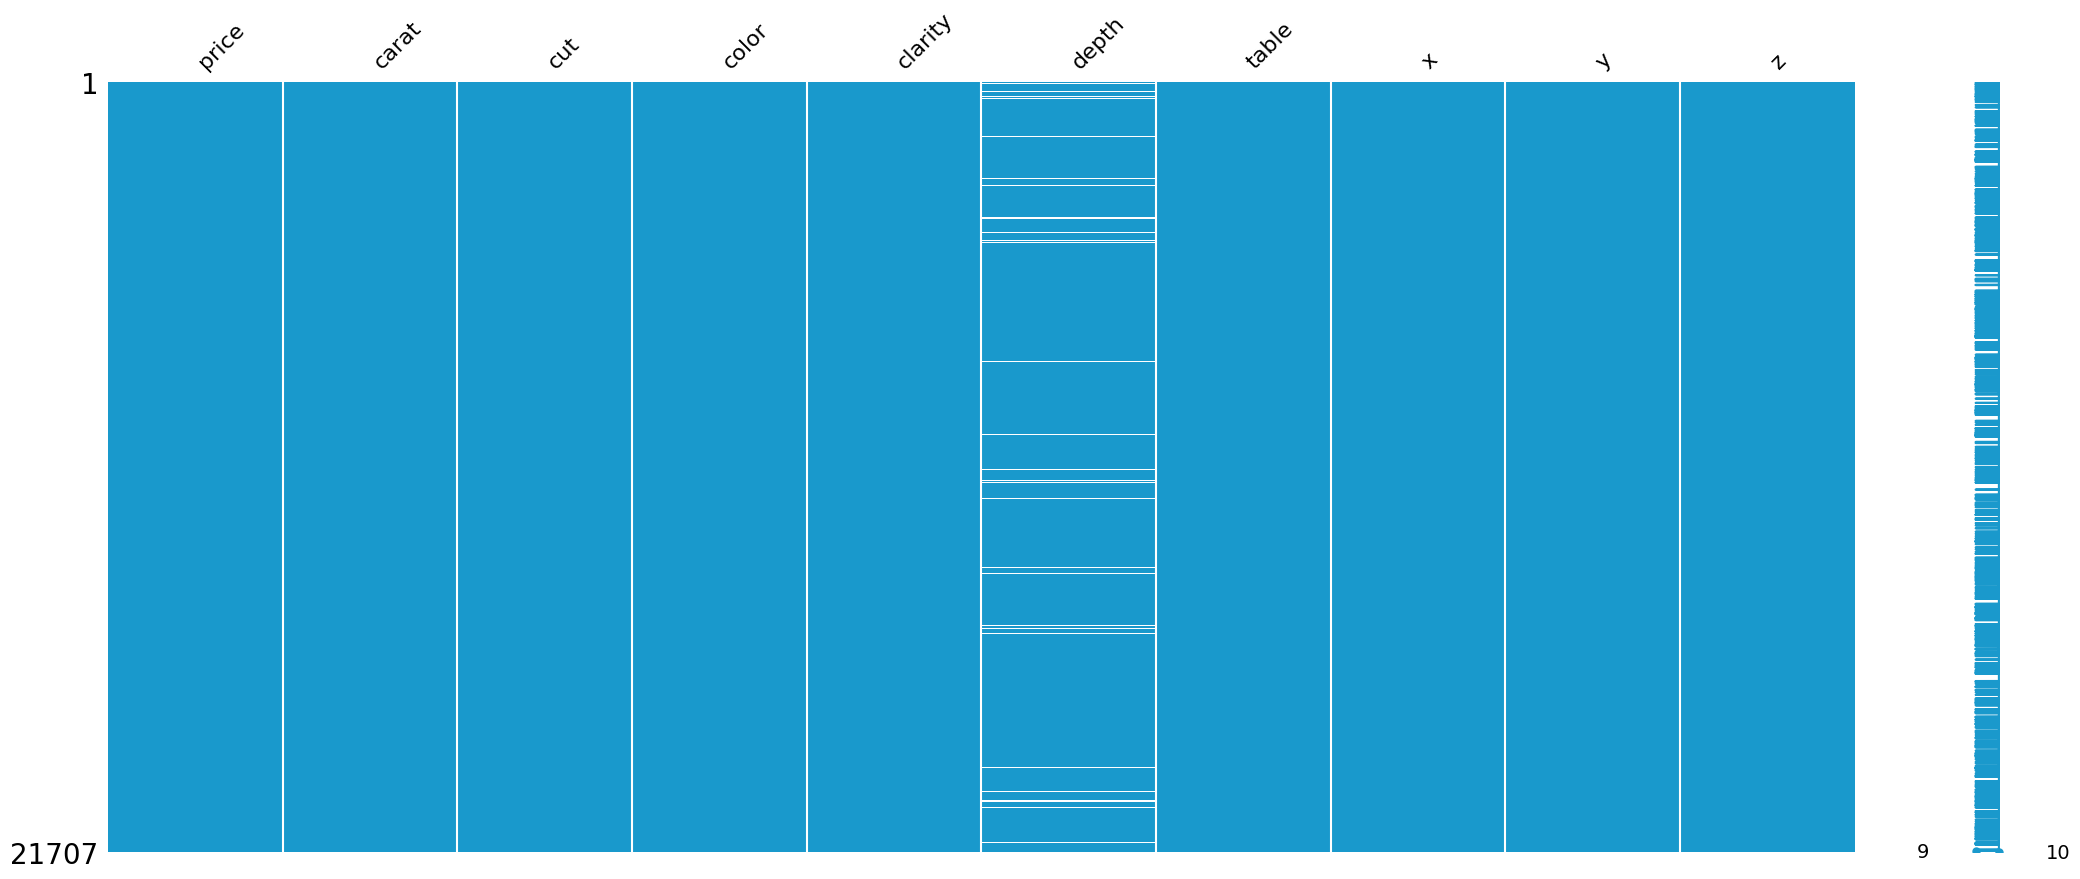

In [ ]:
# 결측치 시각화 라이브러리 불러오기
import missingno as msno

# 결측치 시각화
msno.matrix(df = train, color = (0.1, 0.6, 0.8))

- depth 변수에만 결측치가 있음을 확인할 수 있다.
- 결측치가 얼마나 있는지 plot을 통해 똑같이 확인해보자.

In [ ]:
# NA 값만 따로 저장
train_na = train.isnull().sum()
train_na

price        0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
dtype: int64

<Axes: >

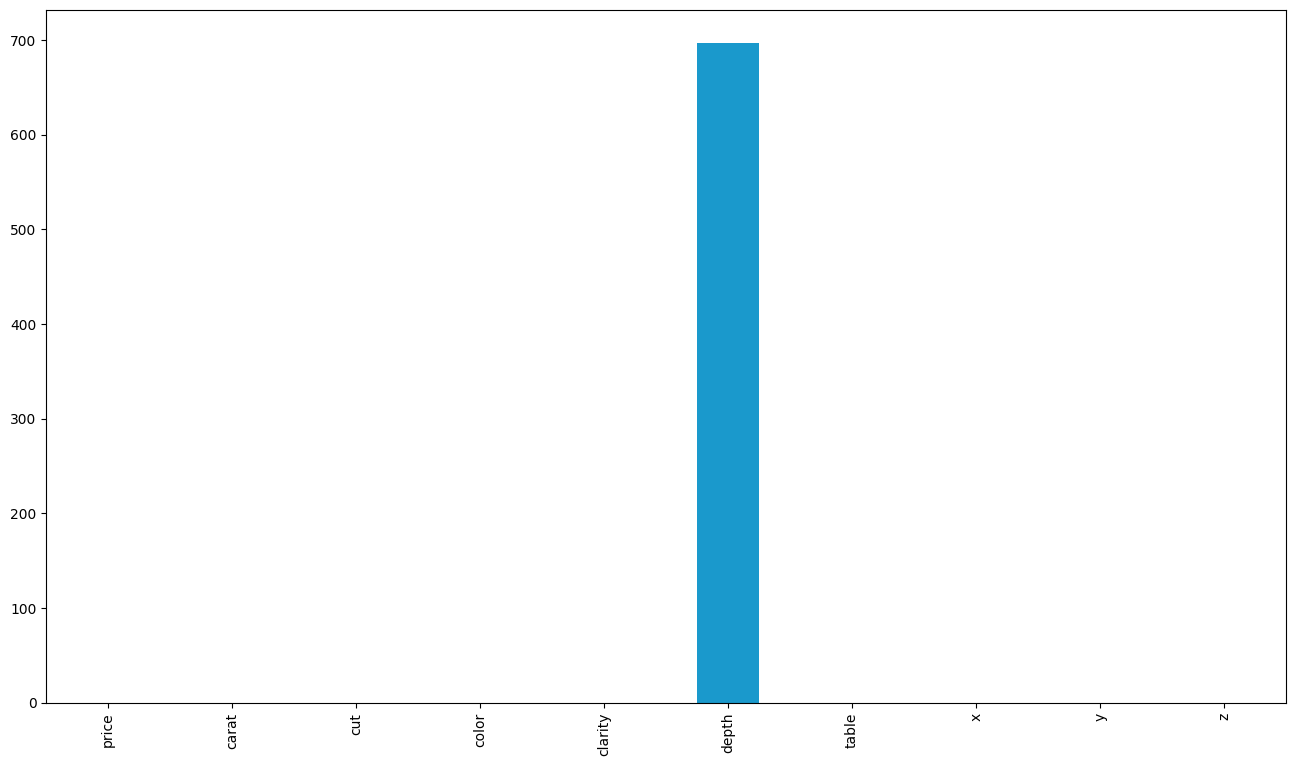

In [ ]:
# 결측치 시각화
train_na.plot.bar(color = (0.1, 0.6, 0.8), figsize = (16,9))

### 3) 변수들 간의 상관관계 파악

In [ ]:
# 상관관계 파악을 위한 라이브러리
import seaborn as sns

train.info() # cut, carat, clarity만 문자형 변수임을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21707 entries, 0 to 21706
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    21707 non-null  int64  
 1   carat    21707 non-null  float64
 2   cut      21707 non-null  int64  
 3   color    21707 non-null  int64  
 4   clarity  21707 non-null  int64  
 5   depth    21707 non-null  float64
 6   table    21707 non-null  float64
 7   x        21707 non-null  float64
 8   y        21707 non-null  float64
 9   z        21707 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.7 MB


In [ ]:
# 수치형 변수만 추출
train_num = train[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']]

# 수치형 변수의 피어슨 상관계수 계산
train_num.corr(method='pearson')

,price,carat,depth,table,x,y,z
price,1.000000,0.921996,-0.008977,0.132846,0.885550,0.887085,0.846189
carat,0.921996,1.000000,0.031849,0.189156,0.976114,0.974987,0.936281
depth,-0.008977,0.031849,1.000000,-0.289415,-0.020399,-0.024194,0.094623
table,0.132846,0.189156,-0.289415,1.000000,0.202117,0.195981,0.153694
x,0.885550,0.976114,-0.020399,0.202117,1.000000,0.998524,0.952215
y,0.887085,0.974987,-0.024194,0.195981,0.998524,1.000000,0.951941
z,0.846189,0.936281,0.094623,0.153694,0.952215,0.951941,1.000000


Text(0.5, 1.0, 'Correlation of Numeric Variables')

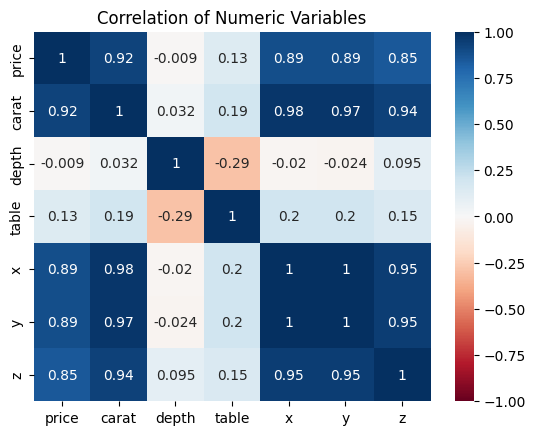

In [ ]:
# 상관관계 시각화
import matplotlib.pyplot as plt

sns.heatmap(train_num.corr(method='pearson'), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Correlation of Numeric Variables')

- 수치형 변수들 간의 상관관계를 살펴보면 'carat'과 'price' 'x', 'y' 와 'z'가 강한 상관관계를 갖고 있다.
- 'carat'은 무게이기 때문에 당연히 무게가 많이 나갈수록 가격도 비쌀것이다.

- 추가로 범주형 변수(cut, color, clarity)에 대한 상관관계 또한 파악할 수 있다.
- 범주가 3개이므로 Cramer's V를 이용하여 상관관계를 분석한다. 아래 그림에서 어떤 기준에 따라 상관관계를 분석해야 하는지 나와있다.

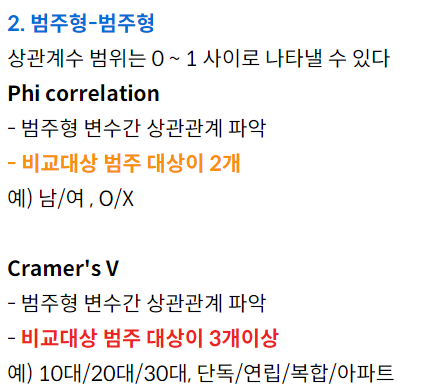

In [ ]:
!pip install researchpy

In [ ]:
# 라이브러리
import researchpy as rp
import numpy as np

# cut-color 상관관계 계산
crosstab1, res1 = rp.crosstab(train['cut'], train['color'], test='chi-square')
res1

,Chi-square test,results
0,Pearson Chi-square ( 24.0) =,145.1881
1,p-value =,0.0000
2,Cramer's V =,0.0409


In [ ]:
# cut-clarity 상관관계 계산
crosstab2, res2 = rp.crosstab(train['cut'], train['clarity'], test='chi-square')

# color-clarity 상관관계 계산
crosstab3, res3 = rp.crosstab(train['color'], train['clarity'], test='chi-square')

In [ ]:
# Cramer's V 값 가져오기
a = res1.iloc[2, 1]
b = res2.iloc[2, 1]
c = res3.iloc[2, 1]

In [ ]:
# 상관관계 행렬 만들기
cramer_v = np.array([[1, a, b], [a, 1, c], [b, c, 1]])
cramer_v_label = ['cut', 'color', 'clarity']

cat_corr = pd.DataFrame(cramer_v, columns=cramer_v_label, index=cramer_v_label)
cat_corr

,cut,color,clarity
cut,1.0000,0.0409,0.1380
color,0.0409,1.0000,0.0768
clarity,0.1380,0.0768,1.0000


Text(0.5, 1.0, 'Correlation of Categorical Variables')

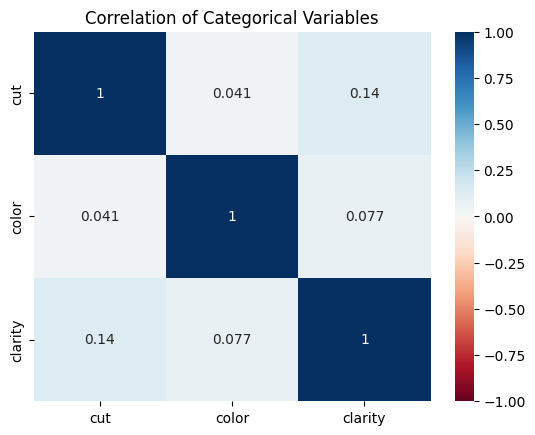

In [ ]:
# 상관관계 plot
sns.heatmap(cat_corr, annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Correlation of Categorical Variables')

- 범주형 변수들 간의 상관관계는 매우 약하다.

### 4) 수치형 변수의 분포 확인

(0.0, 1.0, 0.0, 1.0)

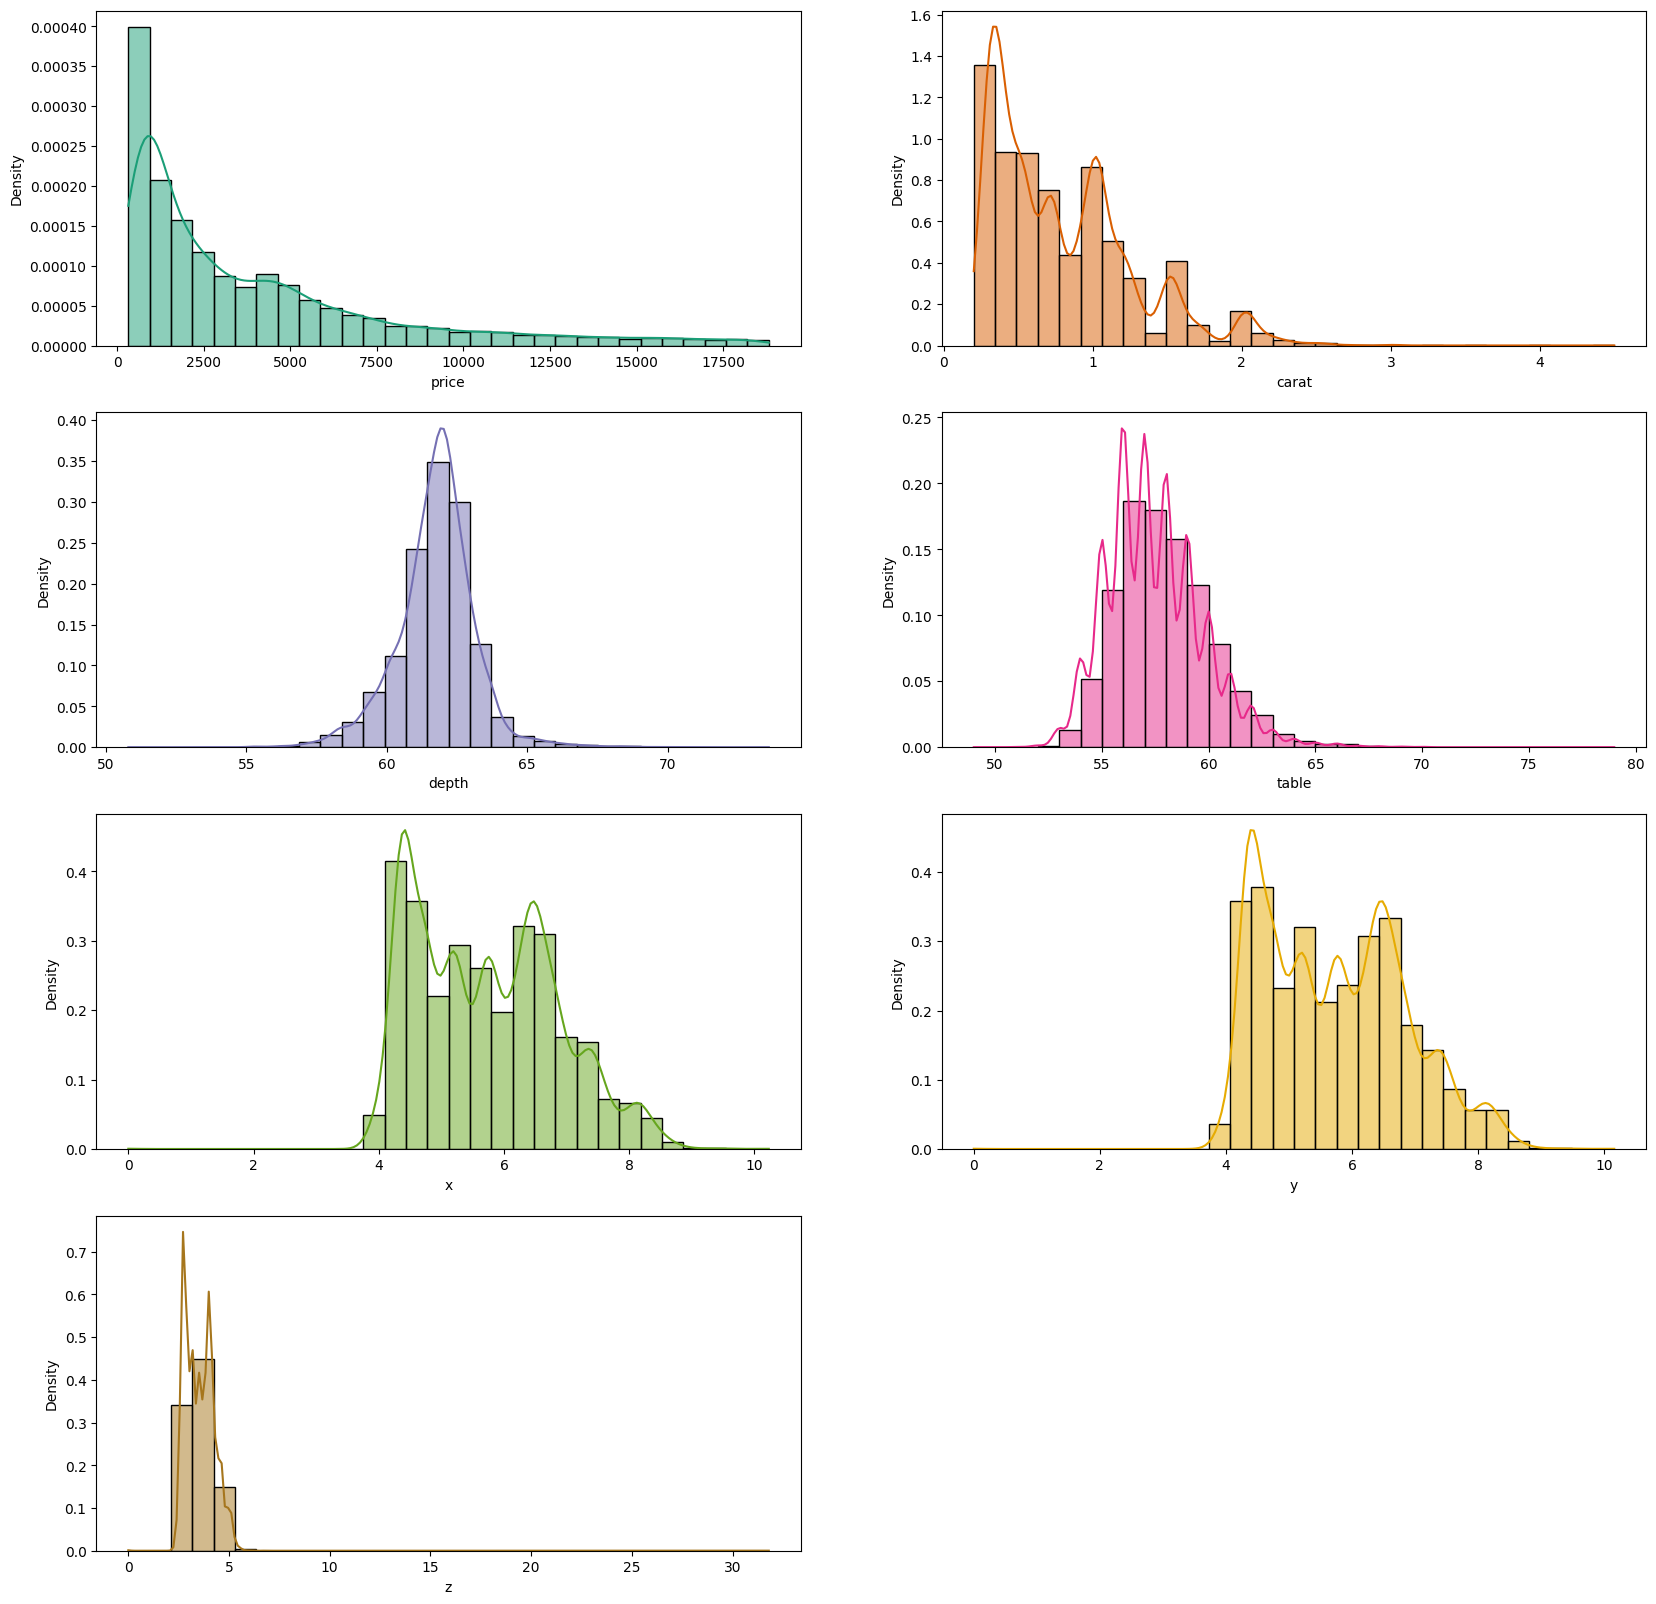

In [ ]:
# plot 여러개 그리기 위한 설정
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# 색 설정
colors = sns.color_palette('Dark2', n_colors = 7)

# density plot 그리기
sns.histplot(data = train, x = train.iloc[:, 0], stat = 'density', kde = True, alpha = 0.5, ax = ax[0, 0], color = colors[0], bins=30)
sns.histplot(data = train, x = train.iloc[:, 1], stat = 'density', kde = True, alpha = 0.5, ax = ax[0, 1], color = colors[1], bins=30)
sns.histplot(data = train, x = train.iloc[:, 5], stat = 'density', kde = True, alpha = 0.5, ax = ax[1, 0], color = colors[2], bins=30)
sns.histplot(data = train, x = train.iloc[:, 6], stat = 'density', kde = True, alpha = 0.5, ax = ax[1, 1], color = colors[3], bins=30)
sns.histplot(data = train, x = train.iloc[:, 7], stat = 'density', kde = True, alpha = 0.5, ax = ax[2, 0], color = colors[4], bins=30)
sns.histplot(data = train, x = train.iloc[:, 8], stat = 'density', kde = True, alpha = 0.5, ax = ax[2, 1], color = colors[5], bins=30)
sns.histplot(data = train, x = train.iloc[:, 9], stat = 'density', kde = True, alpha = 0.5, ax = ax[3, 0], color = colors[6], bins=30)

# 사용 안하는 subplot off
ax[3, 1].axis('off')

### 5) 범주형 변수의 분포 확인

<ipython-input-28-c761d4bc3d02>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data = train, x = 'cut', y = 'price', ci = 95, palette='Pastel1', ax=ax[0,0]) # ci는 95% 신뢰구간으로
<ipython-input-28-c761d4bc3d02>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data = train, x = 'color', y = 'price', ci = 95, palette='Pastel1', ax=ax[0,1])
<ipython-input-28-c761d4bc3d02>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data = train, x = 'clarity', y = 'price', ci = 95, palette='Pastel1', ax=ax[1,0])


(0.0, 1.0, 0.0, 1.0)

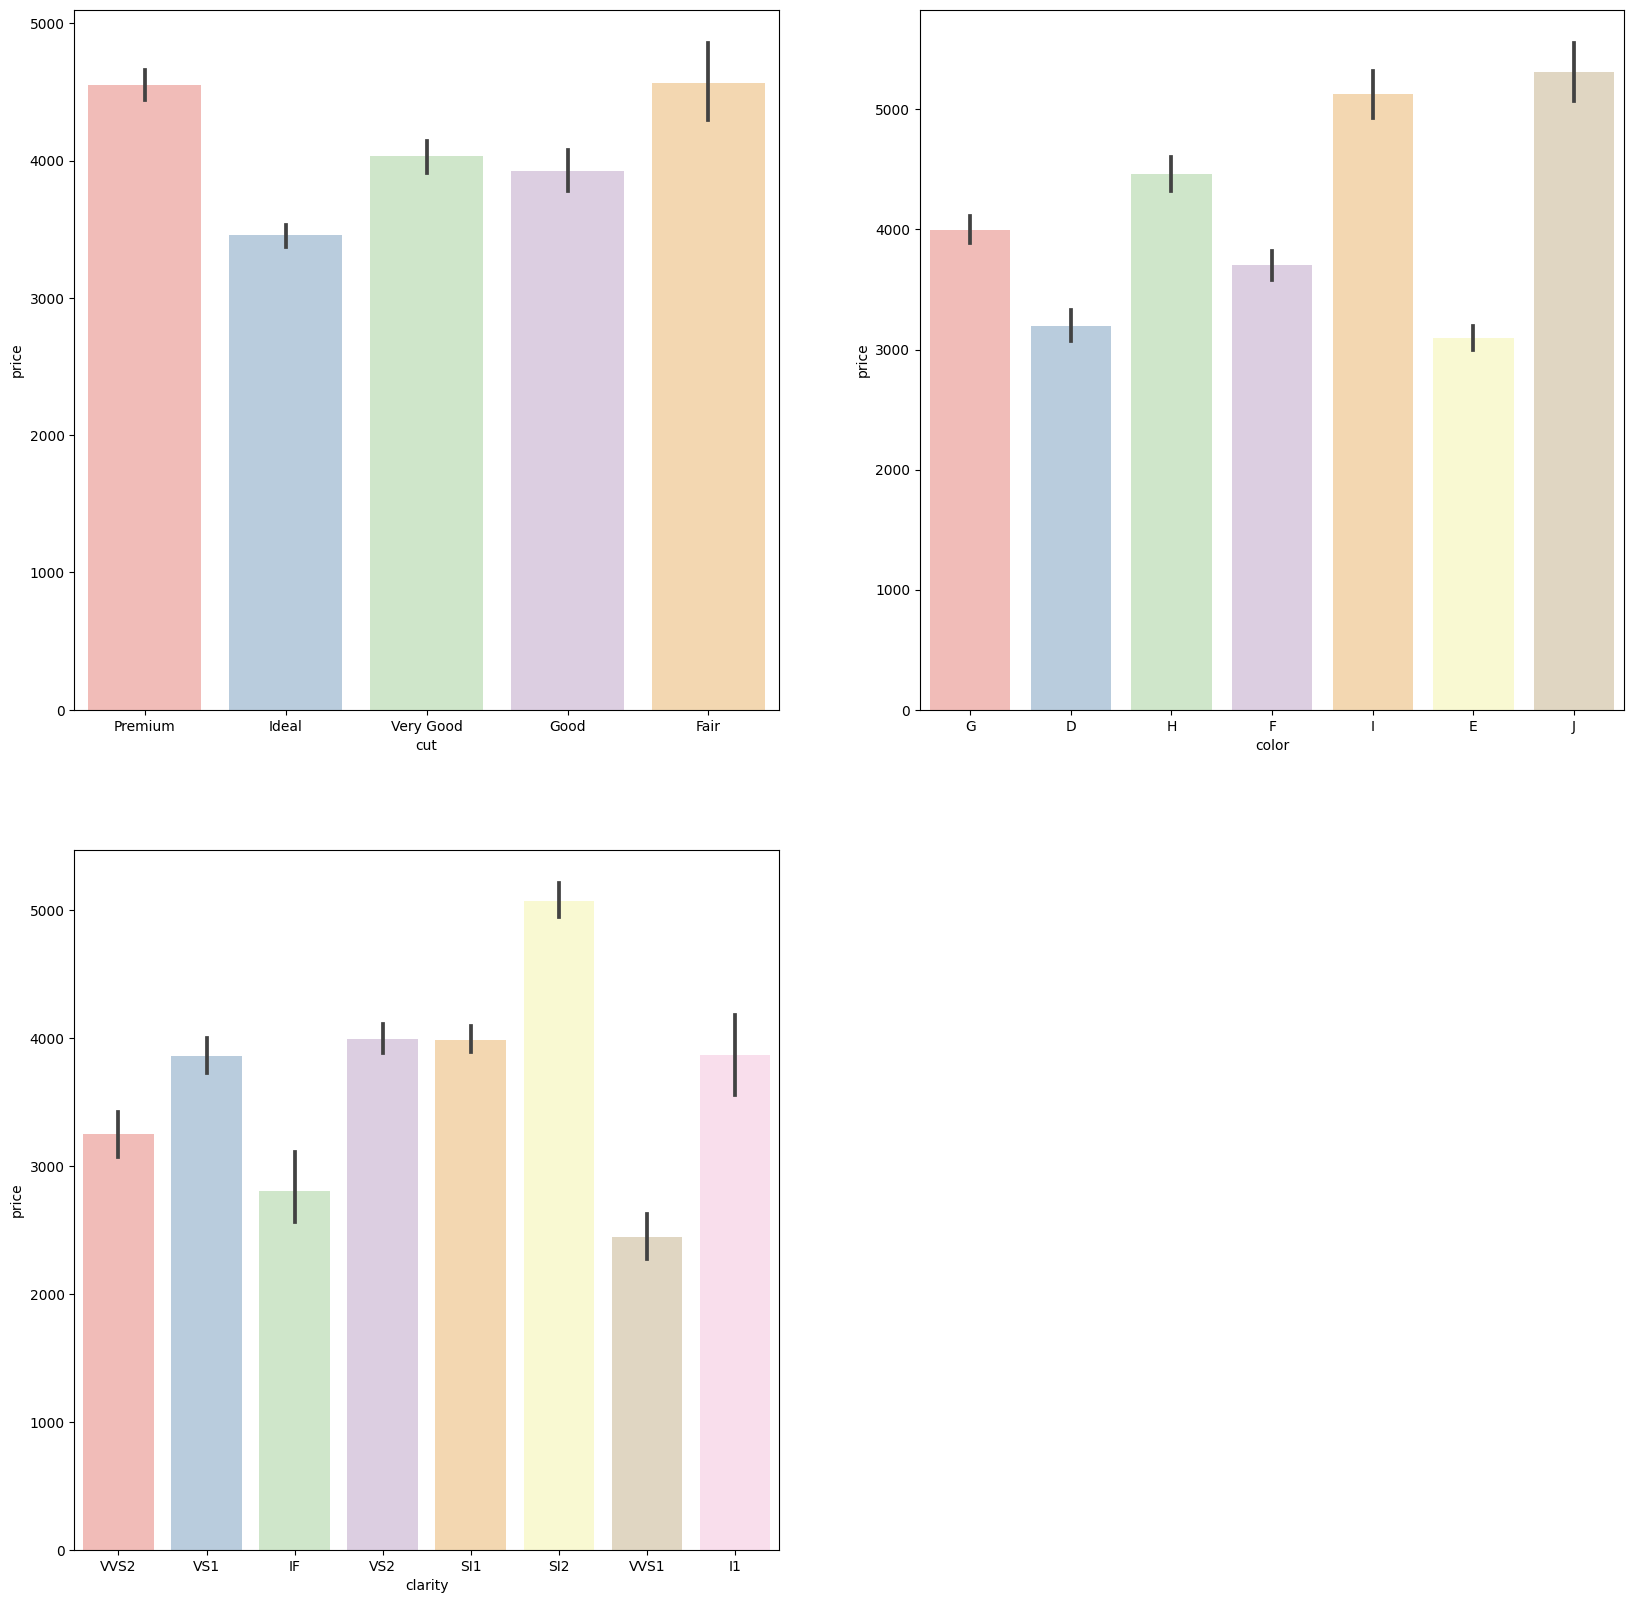

In [ ]:
# plot 여러개 그리기 위한 설정
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# bar plot 그리기
sns.barplot(data = train, x = 'cut', y = 'price', ci = 95, palette='Pastel1', ax=ax[0,0]) # ci는 95% 신뢰구간으로
sns.barplot(data = train, x = 'color', y = 'price', ci = 95, palette='Pastel1', ax=ax[0,1])
sns.barplot(data = train, x = 'clarity', y = 'price', ci = 95, palette='Pastel1', ax=ax[1,0])

# 사용 안하는 subplot off
ax[1, 1].axis('off')

### 6) 결측치 보간

- depth 변수에만 결측치가 있음을 확인했다.
- 결측치 보간은 평균값으로 해준다.

In [ ]:
# Train data의 depth 열 평균값 계산
train_depth_mean = train['depth'].mean()
train_depth_mean

61.74841504045693

In [ ]:
# fillna로 결측치 보간
train['depth'].fillna(train_depth_mean, inplace = True)

In [ ]:
# 보간 이후 결측치 개수 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21707 entries, 0 to 21706
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    21707 non-null  int64  
 1   carat    21707 non-null  float64
 2   cut      21707 non-null  int64  
 3   color    21707 non-null  int64  
 4   clarity  21707 non-null  int64  
 5   depth    21707 non-null  float64
 6   table    21707 non-null  float64
 7   x        21707 non-null  float64
 8   y        21707 non-null  float64
 9   z        21707 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.7 MB


- 결측치가 이제 없음을 확인할 수 있다.

In [ ]:
train['depth'].mean() # 결측치 보간 이후 평균값에 차이가 없다

61.74841504045693

### 7) Label Encoding

- 범주형 변수를 정수로 만들어주는 label encoding을 진행한다.

In [ ]:
# 라이브러리
from sklearn.preprocessing import LabelEncoder

# encoder 생성
encoder = LabelEncoder()

# 데이터에 적용
train['cut'] = encoder.fit_transform(train['cut'].values)
train['color'] = encoder.fit_transform(train['color'].values)
train['clarity'] = encoder.fit_transform(train['clarity'].values)

# 확인
train.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,878,0.30,3,3,7,62.9,55.0,4.28,4.24,2.68
1,3183,0.70,3,0,4,60.9,60.0,5.75,5.71,3.49
2,624,0.30,2,3,4,62.0,56.0,4.29,4.32,2.67
3,743,0.33,3,4,4,61.9,58.0,4.45,4.43,2.75
4,526,0.25,4,2,1,63.3,59.0,3.99,4.04,2.54


In [ ]:
test['cut'] = encoder.fit_transform(test['cut'].values)
test['color'] = encoder.fit_transform(test['color'].values)
test['clarity'] = encoder.fit_transform(test['clarity'].values)

test.head() # 잘 변환됨!

,carat,cut,color,clarity,depth,table,x,y,z
0,1.10,4,2,2,60.5,60.0,6.65,6.67,4.03
1,0.41,1,1,3,63.5,55.0,4.69,4.73,2.99
2,0.25,3,4,6,59.8,59.0,4.07,4.09,2.44
3,1.52,2,4,7,62.8,56.0,7.32,7.30,4.59
4,0.42,2,0,7,62.1,55.0,4.78,4.81,2.98


### 8) K-fold

- Train 데이터를 5개로 분리한다.

In [ ]:
# 시드 고정
np.random.seed(3031)

# 라이브러리
from sklearn.model_selection import KFold

# 독립변수와 종속변수 분리
X = train.drop(columns = ['price'])
y = train['price']

# 5개로 분리
kfold = KFold(n_splits=5, shuffle=True)
kfold.split(X, y)

<generator object _BaseKFold.split at 0x7f9f3fbdc3c0>

### 9) XGBoost & LightGBM 하이퍼파라미터 튜닝

In [ ]:
# 라이브러리
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# 파라미터 후보
params = {'n_estimators' : [300, 400, 500], 'max_depth' : [2, 4, 6], 'learning_rate' : [0.05, 0.1, 0.2]}

# XGBoost 파라미터 튜닝 객체 생성
xgb_search = GridSearchCV(XGBRegressor(), params, n_jobs = -1,
                          scoring = make_scorer(mean_squared_error, greater_is_better=False)) # MSE는 작을수록 좋음

# 튜닝 결과 확인
xgb_search.fit(X, y)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

- 구체적인 파라미터 튜닝은 https://www.kaggle.com/code/lifesailor/xgboost/notebook?scriptVersionId=9848041 참고

In [ ]:
# LGBM 파라미터 튜닝 객체 생성
lgbm_search = GridSearchCV(LGBMRegressor(), params, n_jobs = -1,
                          scoring = make_scorer(mean_squared_error, greater_is_better=False)) # MSE는 작을수록 좋음

# 튜닝 결과 확인
lgbm_search.fit(X, y)

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

### 10) 최적의 파라미터로 모델 학습

In [ ]:
# XBG 최적의 파라미터
xgb_search.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400}

In [ ]:
# 최적의 파라미터로 학습
xgb_best = xgb_search.best_estimator_ # 모델을 다시 만들어도 되지만 이와 같은 방법도 가능

# 스코어 계산
xgb_best.score(X, y)

0.99188403964072

In [ ]:
# LGBM 최적의 파라미터
lgbm_search.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400}

In [ ]:
# 최적의 파라미터로 학습
lgbm_best = lgbm_search.best_estimator_

# 스코어 계산
lgbm_best.score(X, y)

0.9880370475934606

### 11) 변수 중요도 파악

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

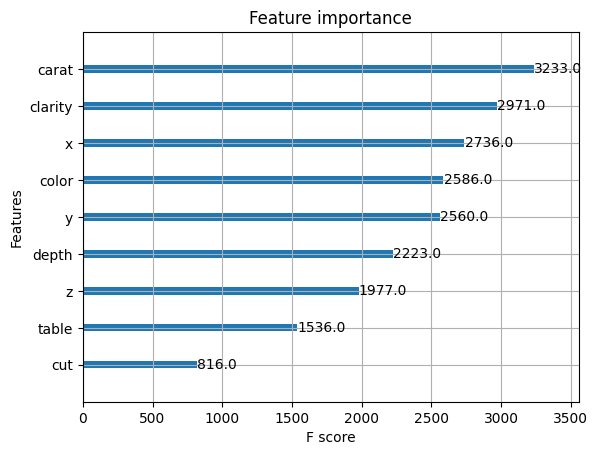

In [ ]:
# 라이브러리
import xgboost as xgb

# 변수 중요도 시각화
xgb.plot_importance(xgb_best)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

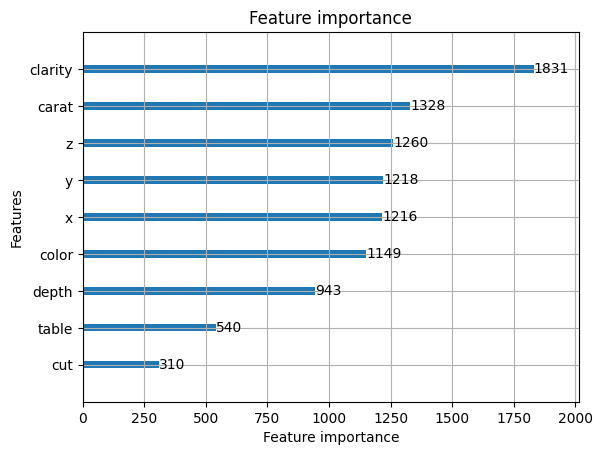

In [ ]:
# 라이브러리
import lightgbm as lgbm

# 시각화
lgbm.plot_importance(lgbm_best)

- 변수 중요도는 다른 방식으로도 확인할 수 있다.

In [ ]:
# 변수 중요도 출력
xgb_best.feature_importances_

# 변수 이름과 함께 매치해서 출력
for name, importance in zip(X.columns, xgb_best.feature_importances_):
    print('{} : {:.4f}'.format(name, importance))

carat : 0.3402
cut : 0.0038
color : 0.0294
clarity : 0.0586
depth : 0.0022
table : 0.0020
x : 0.0048
y : 0.5212
z : 0.0378


Text(0.5, 1.0, 'XGBoost Feature Importance')

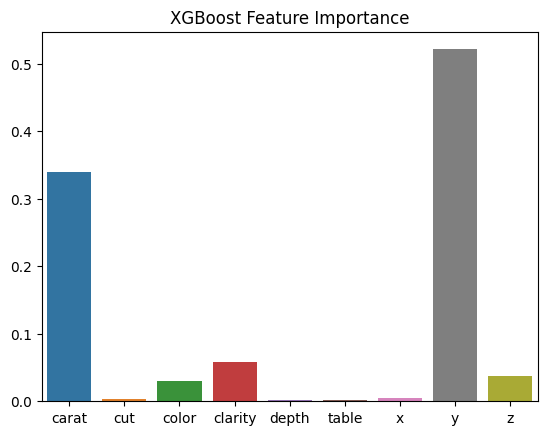

In [ ]:
# 중요도 시각화
sns.barplot(x = X.columns, y = xgb_best.feature_importances_)
plt.title('XGBoost Feature Importance')

- XGB의 경우 'carat'과 'y'가 가장 많이 사용되었다.
- 이 두 변수가 약 80%나 설명하고 있다.

In [ ]:
# 변수 중요도 출력
lgbm_best.feature_importances_

# 변수 이름과 함께 매치해서 출력
for name, importance in zip(X.columns, lgbm_best.feature_importances_):
    print('{} : {:.4f}'.format(name, importance))

carat : 1328.0000
cut : 310.0000
color : 1149.0000
clarity : 1831.0000
depth : 943.0000
table : 540.0000
x : 1216.0000
y : 1218.0000
z : 1260.0000


Text(0.5, 1.0, 'LGBM Feature Importance')

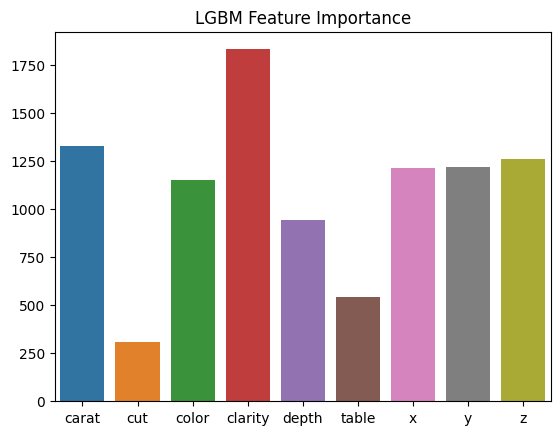

In [ ]:
# 중요도 시각화
sns.barplot(x = X.columns, y = lgbm_best.feature_importances_)
plt.title('LGBM Feature Importance')

- LGBM의 경우 골고루 사용되고 있음을 확인할 수 있다.
- 그 중에서 'clarity'와 'carat'이 가장 많이 사용된다.

### 12) XGB Test 데이터 예측

In [ ]:
# 데이터 읽어오기
sample = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/sample_submission.csv')

# 데이터 확인
sample.head()

,ID_code,price
0,test_1,0
1,test_2,0
2,test_3,0
3,test_4,0
4,test_5,0


In [ ]:
# 예측값 입력
sample['price'] = xgb_best.predict(test)
sample.head()

,ID_code,price
0,test_1,5634.661133
1,test_2,628.988708
2,test_3,530.656372
3,test_4,12079.362305
4,test_5,1322.811401


In [ ]:
# 실제값과 비교
answer = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/answer.csv')
answer.head()

,ID_code,price
0,test_1,5667
1,test_2,638
2,test_3,450
3,test_4,12764
4,test_5,1326


- 모델의 예측값과 실제값이 스케일이 비슷함을 확인할 수 있다.

이제 예측 오차를 계산해본다.

In [ ]:
# XGB의 예측값과 실제값의 MSE
xgb_mse = mean_squared_error(sample['price'], answer['price'], squared=False)
xgb_mse

543.6232733047224

In [ ]:
# XGB의 모델의 MSE
np.sqrt(-(xgb_search.best_score_))

551.8174186043748

- Train 데이터로 모델을 학습시켰을때 MSE는 551이 나왔다. 그리고 test 데이터에 대해서는 543이 나왔다.
- 따라서 Test에서 성능이 더 좋은 underfitting이 발생했다.
- 모델의 복잡도를 개선하는 방향으로 문제점을 해결할 수 있다.

### 13) LGBM Test 데이터 예측

In [ ]:
# 데이터 읽어오기
sample = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/sample_submission.csv')

# 예측값 입력
sample['price'] = lgbm_best.predict(test)

# 실제값과 비교
answer = pd.read_csv('/content/drive/MyDrive/Python/ML/데이터 파일/answer.csv')

In [ ]:
# LGBM의 예측값과 실제값의 MSE(Test)
lgbm_mse = mean_squared_error(sample['price'], answer['price'], squared=False)
lgbm_mse

551.8422445863466

In [ ]:
# XGB의 모델의 MSE(Train)
np.sqrt(-(lgbm_search.best_score_))

563.7928910173785

- LGBM의 경우도 마찬가지로 Train 데이터에서 MSE가 크게 나오는 과소적합이 발생했다.
- 파라미터를 다르게 하면서 모델의 복잡도를 늘려보는 시도가 필요하다.